In [1]:
import pandas as pd
import numpy as np

from pydataset import data
import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare



In [ ]:
import env

In [ ]:
from env import host, user, password

In [ ]:
def get_connection(db, username=user, host=host, password=password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

In [ ]:
def new_telco_data():
    '''
    This function reads the telco data from the Codeup db into a df.
    '''
    sql_query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    
    return df

In [ ]:
df= new_telco_data()
df

In [3]:
import acquire

In [4]:
df = acquire.get_telco_data()
df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [5]:
import prepare

In [18]:
df = prepare.prep_telco_data(df)
pd.set_option('display.max_columns', None)
df.head()

AttributeError: Can only use .str accessor with string values!

In [33]:
from prepare import split

In [34]:
train, validate, test = prepare.split(df, stratify_by= None)

train.shape, validate.shape, test.shape


((3937, 51), (1688, 51), (1407, 51))

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   payment_type_id                        7032 non-null   int64  
 1   internet_service_type_id               7032 non-null   int64  
 2   contract_type_id                       7032 non-null   int64  
 3   customer_id                            7032 non-null   object 
 4   gender                                 7032 non-null   object 
 5   senior_citizen                         7032 non-null   int64  
 6   partner                                7032 non-null   object 
 7   dependents                             7032 non-null   object 
 8   tenure                                 7032 non-null   int64  
 9   phone_service                          7032 non-null   object 
 10  multiple_lines                         7032 non-null   object 
 11  onli

In [ ]:
df

# set data contex 

Text(0.5, 1.0, 'churned Customers')

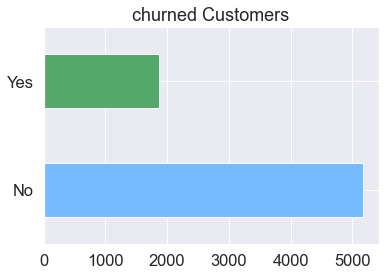

In [72]:
df.churn.value_counts().plot(kind= 'barh', color = ["xkcd:sky blue", "g"])
plt.title("churned Customers")

<AxesSubplot:xlabel='internet_service_type', ylabel='count'>

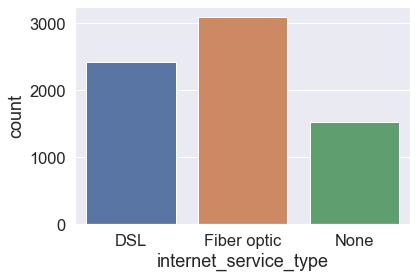

In [71]:
sns.countplot(x='internet_service_type', data=df)

<AxesSubplot:xlabel='senior_citizen', ylabel='count'>

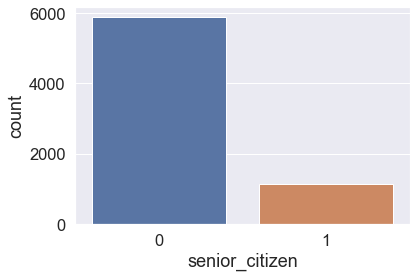

In [74]:
sns.countplot(x='senior_citizen', data=df)

In [ ]:
chrts for payment, charts for services, charts for 

In [14]:
features= ['internet_service_type', 'contract_type','payment_type', 'tech_support', ]

In [15]:
enumerate(features)

In [16]:
list(enumerate(features))

[(0, 'internet_service_type'),
 (1, 'contract_type'),
 (2, 'payment_type'),
 (3, 'tech_support')]

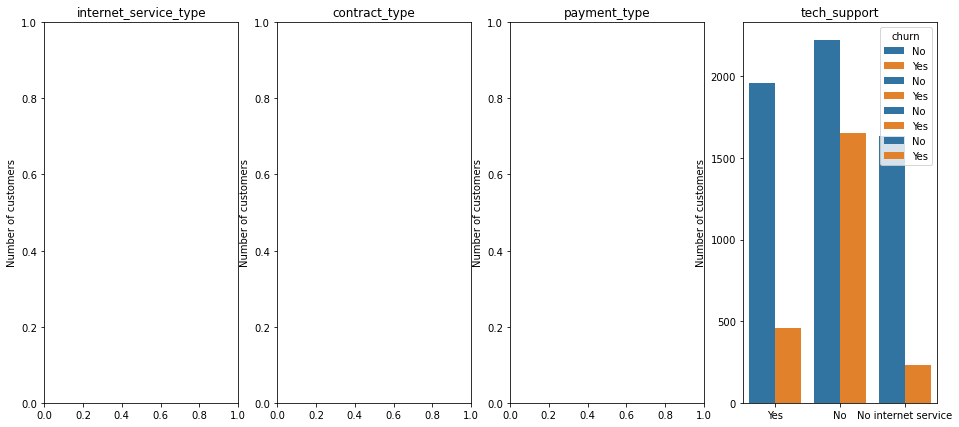

In [29]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 7), sharey=)
for i, feature in enumerate(features):
    sns.countplot(x=feature, data=df, hue="churn")
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Number of customers')
    ax[i].set_title(feature)

<AxesSubplot:xlabel='internet_service_type', ylabel='count'>

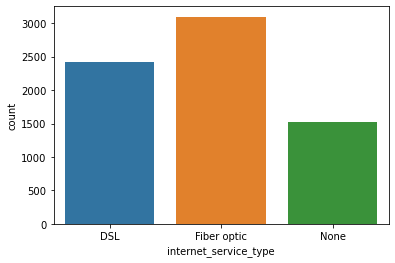

In [30]:
sns.countplot(x='internet_service_type', data=df)

<AxesSubplot:xlabel='internet_service_type', ylabel='count'>

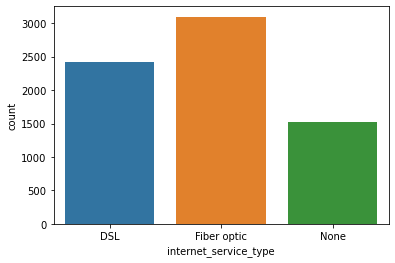

In [31]:
sns.countplot(x='internet_service_type', data=df)

ValueError: Cannot pass values for both `x` and `y`

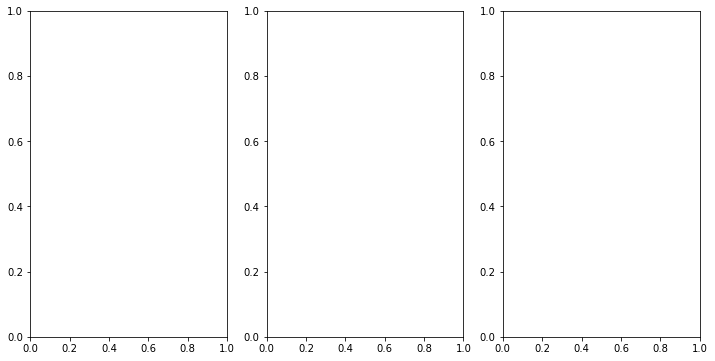

In [39]:

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, feature in enumerate(features):
    sns.countplot(
        feature,
        "count",
        data=df,
        ax=ax[i],
        palette=["blue", "orange"],
    )

# Telco exploration 

Univariate means a single variable, so we'll look at .value_counts() and histograms. - Explore the target variable itself. What is the distribution of values?

have o ask at least 4 questions 

question 1 - 

In [ ]:
train.info()

In [ ]:
train.churn.value_counts()
#this is only going to be exploring the train data set 

In [ ]:
train.describe()

In [ ]:
plt.hist(train.partner)

In [ ]:
# Plot numeric columns
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [ ]:
 plt.hist(train['monthly_charges'])

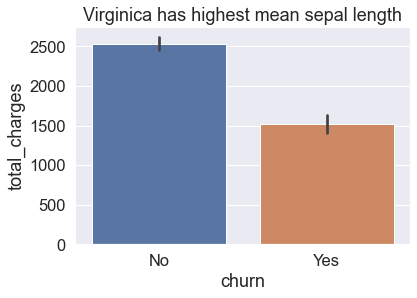

In [57]:
plt.title("Virginica has highest mean sepal length")
sns.barplot(x="churn", y="total_charges", data=train)
plt.xlabel('churn')
plt.show()

Question 1 -are customers who pay with electronci check more or less liekly to churn ?

In [ ]:
sns.barplot(x="churn", y="total_charges", data=train)

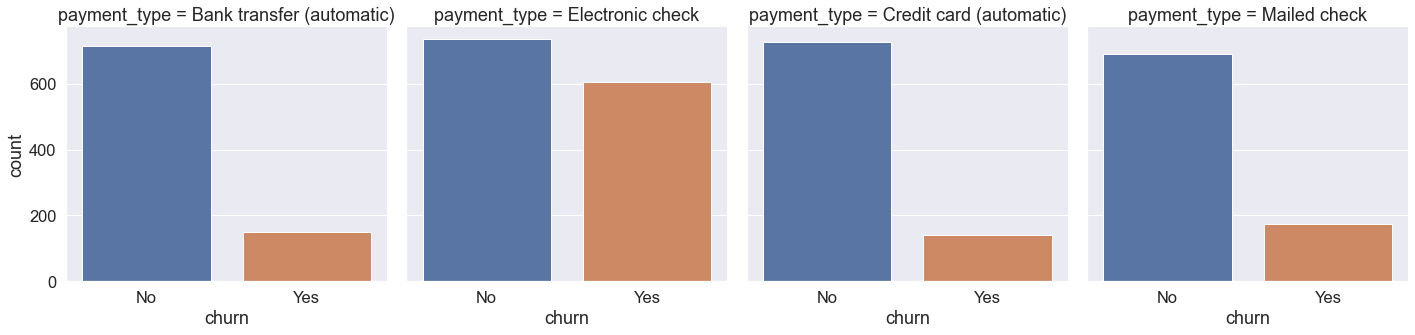

In [48]:
sns.set(font_scale = 1.5)
sns.catplot(x="churn", col="payment_type", data=train, kind="count")


In [ ]:
#statistical testing for this 
discreet  and cont variable

are seniors citizens ,ore likely to churn with higher mnthly charges than non seniors 

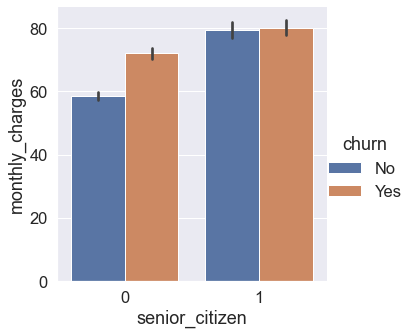

In [70]:

sns.catplot(x="senior_citizen", y="monthly_charges", hue="churn", data=train, kind="bar")


Question 3 -is somoen with tech supportloer the chance of churn?

<AxesSubplot:xlabel='tech_support', ylabel='count'>

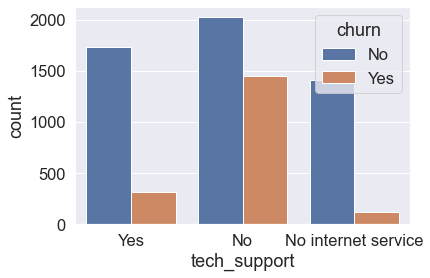

In [79]:
sns.countplot(x='tech_support', data=df, hue="churn")